# Plot Cell Birth Time vs. Cell Cycle Time - show whether timing of cell birth throughout the movie influences the intermitotic time:

+ Account for all movies in the MDCK dataset
+ Calculate for cells in Gen #1-6
+ Only include cells with cell cycle duration of <7.0, 42.0>

**Studies that report correlation coefficients:**
+ [Kuchen et al., 2020](https://elifesciences.org/articles/51002 "Hidden long-range memories of growth and cycle speed correlate cell cycles in lineage trees") - TET21N neuroblastoma cells (count = ???)
+ [Chakrabarti et al., 2018](https://www.nature.com/articles/s41467-018-07788-5 "Hidden heterogeneity and circadian-controlled cell fate inferred from single cell lineages") - HCT116 human colorectal cancer cells (count = 71 vs 80 pairs)
+ [Sandler et al., 2015](https://www.nature.com/articles/nature14318 "Lineage correlations of single cell division time as a probe of cell-cycle dynamics") - L1210 lymphoblast cells (count = 432 vs 423 cells)
+ [Staudte el al., 1974](https://www.sciencedirect.com/science/article/pii/S0022519384801150 "Additive models for dependent cell populations")

In [1]:
import h5py
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from Development.Movie_Analysis_Pipeline.Single_Movie_Processing.Server_Movies_Paths import Get_MDCK_Movies_Paths_Temporary
sys.path.append("../")
from Family_Relations.Find_Family_Members_Class import Find_Family
from tqdm import tqdm
from scipy import stats


In [2]:
movies = Get_MDCK_Movies_Paths_Temporary()
cct, cbt = [], []

for movie in movies:
    hdf5_file = movie + "HDF/segmented.hdf5"
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    print (f"{date}, {pos}", end="\t")
    
    with h5py.File(hdf5_file, 'r') as f:
        lbepr_1 = list(f['tracks']['obj_type_1']['LBEPR'])
        lbepr_2 = list(f['tracks']['obj_type_1']['Ch_Ch_Gen_CCT'])
        
        for cell, progeny in zip(lbepr_1, lbepr_2):
            if cell[4] != 0 and progeny[0] != 0 and progeny[1] != 0:
                if progeny[2] != 0 and progeny[2] < 7: 
                    if 7.0 <= progeny[3] <= 42.0:
                        cct.append(progeny[3])
                        cbt.append(cell[1])


AB0124, pos7	AB0124, pos8	AB0124, pos9	AB0327, pos0	AB0327, pos10	AB0327, pos2	AB0327, pos4	AB0327, pos6	AB0327, pos8	AB0724, pos0	AB0724, pos11	AB0724, pos13	AB0724, pos2	AB0724, pos4	AB0724, pos6	AB0724, pos7	AB0724, pos8	AB0724, pos9	AB0731, pos0	AB0731, pos1	AB0731, pos2	AB0731, pos3	AB0731, pos4	AB0731, pos5	AB0731, pos6	AB0731, pos7	AB0731, pos8	GV0794, pos11	GV0794, pos12	GV0795, pos0	GV0795, pos11	GV0795, pos12	GV0795, pos13	GV0796, pos11	GV0796, pos12	GV0796, pos13	GV0796, pos14	GV0798, pos0	GV0798, pos11	GV0798, pos12	GV0798, pos13	GV0800, pos0	GV0800, pos11	GV0800, pos12	

In [3]:
print (len(cbt)) # Cool!

20074


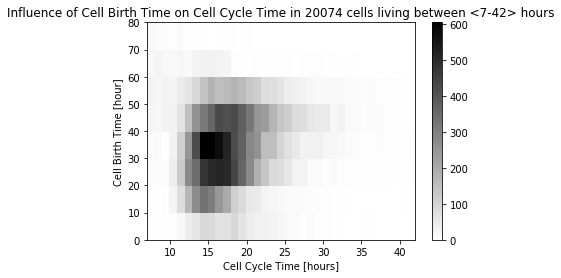

In [4]:
# Change to hours:
cbt_hours = [item * 4 / 60 for item in cbt]

plt.hist2d(x=cct, y=cbt_hours, bins=(35, 8), range=((7, 42), (0, 80)), cmap="binary")
plt.title(f"Influence of Cell Birth Time on Cell Cycle Time in {len(cct)} cells living between <7-42> hours")
plt.xlabel("Cell Cycle Time [hours]")
plt.ylabel("Cell Birth Time [hour]")
plt.colorbar()
plt.show()


In [5]:
save_dr = "/Users/kristinaulicna/Documents/LIDo_PhD_Programme/Cells_MDCK/overall_analysis/Figure_2_Three_Candidates/cell_cycle_graphs/"


In [6]:
# Calculate mean / median per histogram row to display in scatter plot:
lower, upper = 0, 10
mean_list, median_list, std_list, sem_list = [], [], [], []

for i in range(11): 
    cbt_ranged = [item_cct for item_cbt, item_cct in zip(cbt_hours, cct) if lower <= item_cbt < upper]
    mean_list.append(np.mean(cbt_ranged))
    std_list.append(np.std(cbt_ranged))
    sem_list.append(np.std(cbt_ranged)/np.sqrt(len(cbt_ranged)))
    median_list.append(np.median(cbt_ranged))
    lower += 10 
    upper += 10 


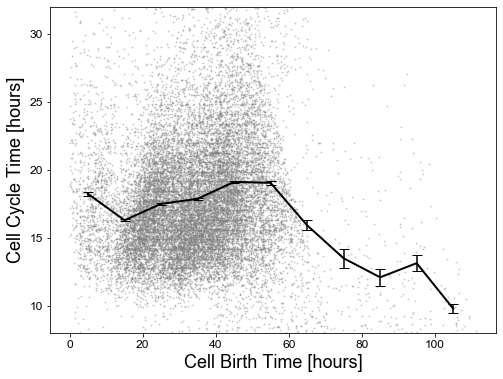

In [8]:
_ = plt.figure(figsize=(8, 6))
plt.scatter(x=cbt_hours, y=cct, s=1, color="grey", alpha=0.3)
plt.errorbar(x=range(5, 115, 10), y=mean_list, yerr=sem_list, color="black", linewidth=2.0, linestyle="solid", capsize=5, ecolor="black", elinewidth=1.5, label="Mean")
plt.ylabel("Cell Cycle Time [hours]", fontname="Arial", fontsize=18)
plt.xlabel("Cell Birth Time [hours]", fontname="Arial", fontsize=18)
plt.xticks(fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
plt.ylim(8, 32)

plt.savefig(save_dr + "cell_birth_scatter.pdf", bbox_to_inches="tight", transparent=True)
plt.show()
